In [72]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



In [3]:
df = pd.read_csv('LoanApprovalPrediction2.csv')
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [8]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


Dependents: skewness = 0.99


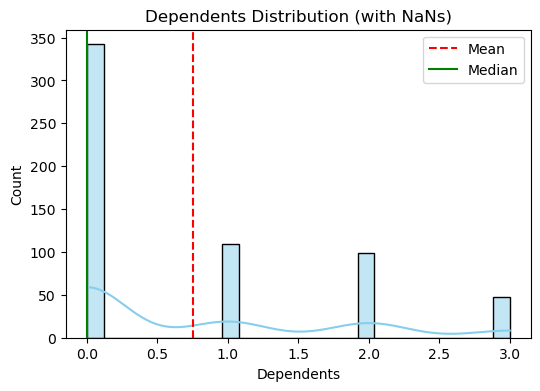

LoanAmount: skewness = 2.53


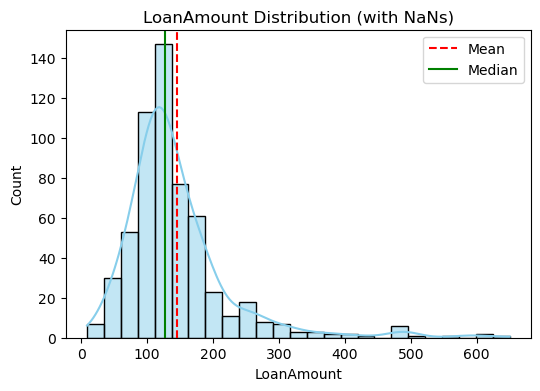

Loan_Amount_Term: skewness = -2.40


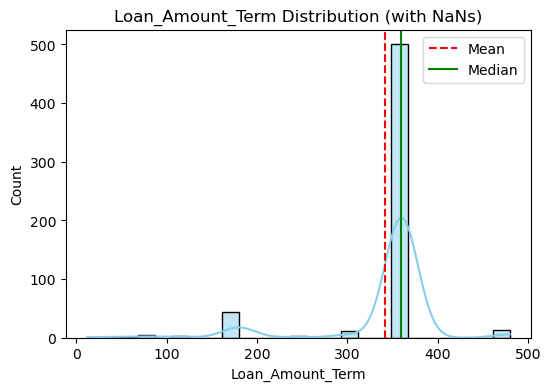

Credit_History: skewness = -1.89


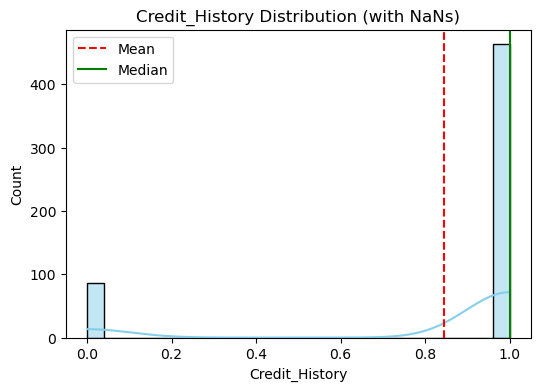

In [9]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load your dataset
df = pd.read_csv("LoanApprovalPrediction.csv")

missing_columns = ['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# Step 5: Visualize each numeric column’s distribution
for col in missing_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=25)
    
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='-', label='Median')
    
    plt.title(f"{col} Distribution (with NaNs)")
    print(f"{col}: skewness = {df[col].skew():.2f}")
    plt.legend()
    plt.show()

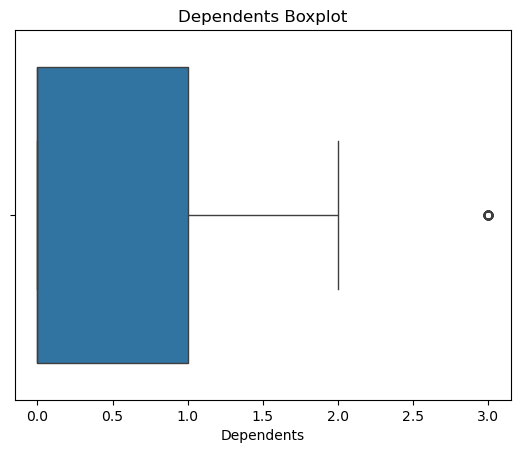

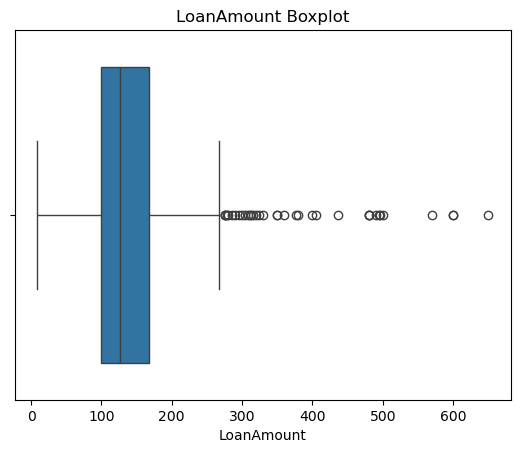

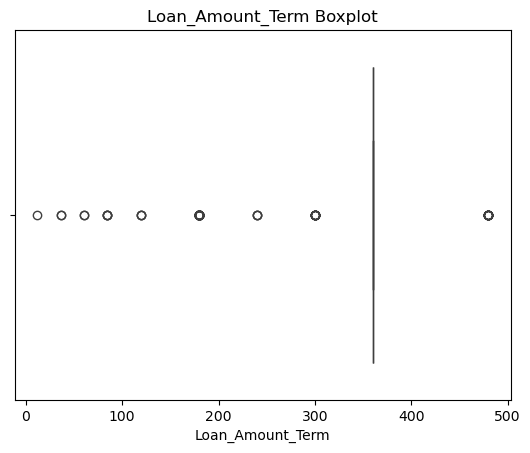

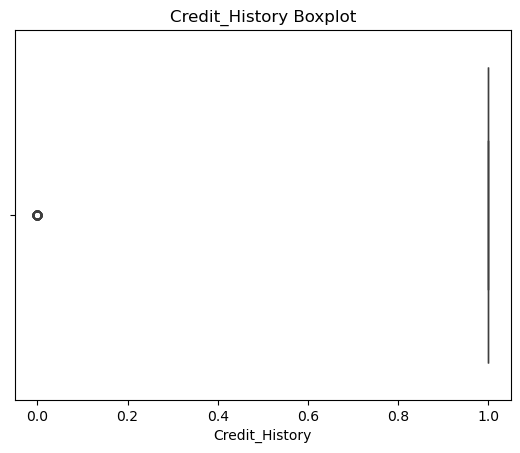

In [10]:
for col in missing_columns:
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

In [11]:
# Cleaning the dependants
# normally, for categprical data, we use mode, but since the value is not as much, we can use mode directly, or manually do it to make sense

import math
married_dependents = math.floor(df[df['Married'] == 'Yes']['Dependents'].mean())
print(f"The average number of dependents for married individuals is: {married_dependents}")

single_dependents = math.floor(df[df['Married'] == 'No']['Dependents'].mean())
print(f"The average number of dependents for single individuals is: {single_dependents}")

The average number of dependents for married individuals is: 1
The average number of dependents for single individuals is: 0


In [12]:
# df['Dependents'] = df.apply(
#     lambda row: 1 if pd.isnull(row['Dependents']) and row['Married'] == 'Yes'
#     else 0 if pd.isnull(row['Dependents']) and row['Married'] == 'No'
#     else row['Dependents'],
#     axis=1
# )


In [13]:
# Fill where Married == 'Yes'
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'Yes'), 'Dependents'] = 1

# Fill where Married == 'No'
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'No'), 'Dependents'] = 0


In [17]:
df.isnull().sum()
df['Dependents'].isnull().sum()

np.int64(0)

In [18]:
# This si to check if it is Numerical or categorical. in this case, it is numerical

df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    16
100.0    15
187.0    12
113.0    11
         ..
146.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 199, dtype: int64

In [20]:
# use the median amount to fillna for LoanAmount and Loan_Amount_Term

# median_loan_amount = df['LoanAmount'].median()
# df['LoanAmount'].fillna(median_loan_amount, inplace=True)

missing_columns = ['LoanAmount', 'Loan_Amount_Term']


for col in missing_columns:
    df[col].fillna(df[col].median())

In [21]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

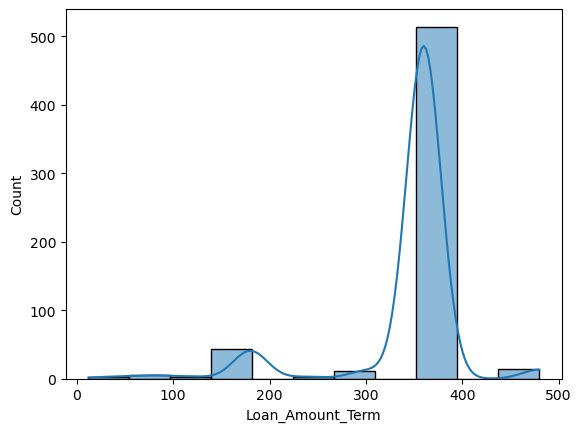

In [23]:
import seaborn as sns

sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.show()

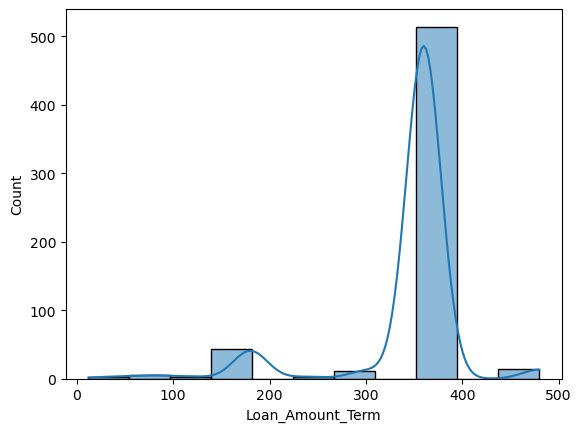

In [24]:
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.show()

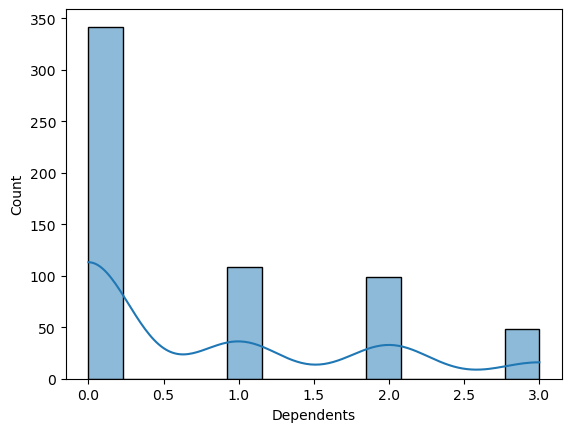

In [25]:
sns.histplot(df['Dependents'], kde=True)
plt.show()

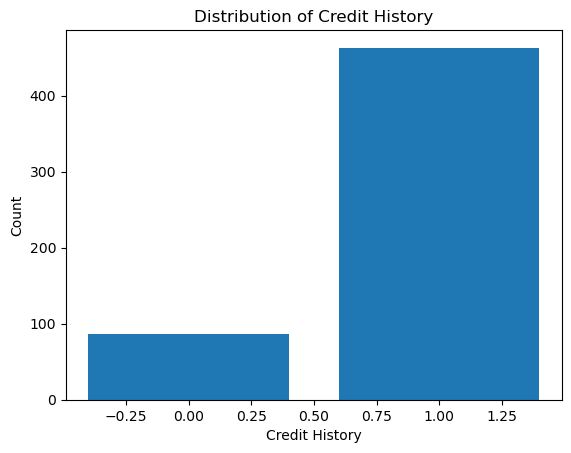

In [26]:
counts = df['Credit_History'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Distribution of Credit History')
plt.show()

In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
test = df[df.isna().any(axis=1)]
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
23,LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.0,360.0,NaN,Urban,N
41,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
78,LP001264,Male,Yes,3,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
82,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
85,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
94,LP001326,Male,No,0,Graduate,Yes,6782,0.0,127.0,360.0,NaN,Urban,N
115,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
123,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [30]:
df2 = df.copy()
df2.dropna(inplace=True)
train = df2.copy()

In [31]:
b = df2['Credit_History']
df2.drop(['Credit_History', 'Loan_ID'], axis=1, inplace=True)

In [34]:
# for one hot encoding

df2 = pd.get_dummies(df2, columns=['Gender', 'Married', 'Education', 'Property_Area', 'Self_Employed', 'Loan_Status'], drop_first=True)
A = df2
#  for Spliting dataset

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=4) 

KeyError: "None of [Index(['Gender', 'Married', 'Education', 'Property_Area', 'Self_Employed',\n       'Loan_Status'],\n      dtype='object')] are in the [columns]"

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
)
import joblib
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [36]:
knn = KNeighborsClassifier()
model = knn.fit(A_train, b_train)
y_proba = model.predict_proba(A_test)
y_pred = model.predict(A_test)

In [38]:
print('Test Accuracy:', accuracy_score(b_test, y_pred))

Test Accuracy: 0.8545454545454545


In [39]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# 4. Hyperparameter grid
param_grid = {
    'knn__n_neighbors': [20, 21, 25, 27, 30],
    'knn__weights': ['uniform'],
    'knn__metric': ['euclidean']
   # 'knn__leaf_size': [20, 30, 40]
}

In [40]:
# 5. GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=cv,
    verbose=1,
    return_train_score=True
)

grid.fit(A_train, b_train)
print('Best parameters:', grid.best_params_)
print('Best ROC AUC (CV):', grid.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 27, 'knn__weights': 'uniform'}
Best ROC AUC (CV): 0.8743289262820513


In [42]:
# 6. Evaluate on test set
best_model = grid.best_estimator_
y_proba = best_model.predict_proba(A_test)[:, 1]
y_pred = best_model.predict(A_test)

print('Test Accuracy:', accuracy_score(b_test, y_pred))
print('Test ROC AUC:', roc_auc_score(b_test, y_proba))
#print(classification_report(y_test, y_pred, target_names=np.unique(y_test)))

Test Accuracy: 0.8666666666666667
Test ROC AUC: 0.822949777495232


In [43]:
test.dropna(inplace=True, axis=1)
test.drop(['Loan_ID'], axis=1, inplace=True)
test = pd.get_dummies(test, columns=['Gender', 'Married', 'Education', 'Property_Area', 'Self_Employed', 'Loan_Status'], drop_first=True)

predicted_values = best_model.predict(test)
predicted_values

C:\Users\Purple_Serve\AppData\Local\Temp\ipykernel_35600\1144310777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True, axis=1)
C:\Users\Purple_Serve\AppData\Local\Temp\ipykernel_35600\1144310777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Loan_ID'], axis=1, inplace=True)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [44]:
test['Credit_History'] = predicted_values
test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Loan_Status_Y,Credit_History
16,1,3596,0.0,100.0,240.0,True,False,True,False,True,False,True,1.0
23,1,3717,2925.0,151.0,360.0,True,True,False,True,False,True,False,1.0
29,1,4166,3369.0,201.0,360.0,True,True,False,False,True,True,False,1.0
41,0,2400,0.0,75.0,360.0,True,True,False,False,True,False,True,1.0
78,3,3333,2166.0,130.0,360.0,True,True,True,True,False,True,True,1.0
82,0,6000,2250.0,265.0,360.0,True,True,False,True,False,False,False,1.0
85,2,3333,2000.0,99.0,360.0,True,True,True,True,False,False,True,1.0
94,0,6782,0.0,127.0,360.0,True,False,False,False,True,True,False,1.0
115,1,2214,1398.0,85.0,360.0,True,True,False,False,True,False,True,1.0
123,0,3692,0.0,93.0,360.0,False,False,False,False,False,False,True,1.0


In [45]:
train.drop('Loan_ID', axis=1, inplace=True)
newdata = pd.concat([train, test], axis=0)
newdata
newdata.to_csv('clean_data.csv', index=False)

In [46]:
newdata

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Loan_Status_Y
0,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,NaN,NaN,0,NaN,NaN,3017,663.0,102.0,360.0,1.0,NaN,NaN,False,True,True,True,False,False,True
543,NaN,NaN,0,NaN,NaN,2667,1625.0,84.0,360.0,1.0,NaN,NaN,False,False,False,False,True,False,True
552,NaN,NaN,0,NaN,NaN,4467,0.0,120.0,360.0,1.0,NaN,NaN,True,True,True,False,False,False,True
569,NaN,NaN,1,NaN,NaN,1880,0.0,61.0,360.0,0.0,NaN,NaN,True,True,False,False,False,False,False


In [59]:
df3 = df.copy()
df3.dropna(inplace=True)

# d_test = df[df.isna().any(axis=1)]

In [60]:
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [55]:
d_test = df[df.isna().any(axis=1)]

In [58]:
d_test
d_test['Credit_History'] = predicted_values
d_test

C:\Users\Purple_Serve\AppData\Local\Temp\ipykernel_35600\2931732146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_test['Credit_History'] = predicted_values


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,1.0,Urban,Y
23,LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.0,360.0,1.0,Semiurban,N
29,LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.0,360.0,1.0,Urban,N
41,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,1.0,Urban,Y
78,LP001264,Male,Yes,3,Not Graduate,Yes,3333,2166.0,130.0,360.0,1.0,Semiurban,Y
82,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
85,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,1.0,Semiurban,Y
94,LP001326,Male,No,0,Graduate,Yes,6782,0.0,127.0,360.0,1.0,Urban,N
115,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,1.0,Urban,Y
123,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,1.0,Rural,Y


In [63]:
d_newdata = pd.concat([df3, d_test], axis=0)
d_newdata.to_csv('d_clean_data.csv', index=False)
d_newdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,LP002757,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,1.0,Semiurban,Y
543,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,1.0,Urban,Y
552,LP002833,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,1.0,Rural,Y
569,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,0.0,Rural,N


In [64]:
d_newdata.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

NOW USING DECISION TREE FOR LOAN STATUS MODEL

In [66]:
data = d_newdata.copy()
data.drop(['Loan_Status', 'Loan_ID'], axis=1, inplace=True)

data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Property_Area', 'Self_Employed'], drop_first=True)
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0,5849,0.0,127.0,360.0,1.0,True,False,False,False,True,False
1,1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,True,True,False,False,True,True
3,0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,True,False
4,0,6000,0.0,141.0,360.0,1.0,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
531,0,3017,663.0,102.0,360.0,1.0,False,True,True,True,False,False
543,0,2667,1625.0,84.0,360.0,1.0,False,False,False,False,True,False
552,0,4467,0.0,120.0,360.0,1.0,True,True,True,False,False,False
569,1,1880,0.0,61.0,360.0,0.0,True,True,False,False,False,False


In [67]:
X = data
y = d_newdata['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [68]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6611111111111111


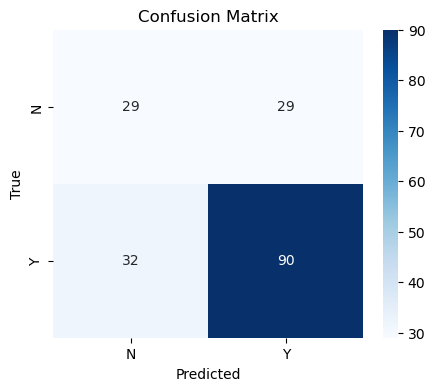

In [73]:
import numpy as np

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# Optimization

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7388888888888889


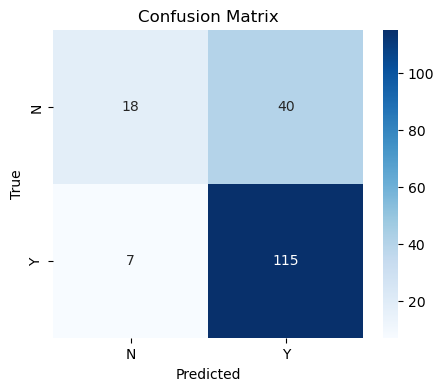

In [77]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.72      0.31      0.43        58
           Y       0.74      0.94      0.83       122

    accuracy                           0.74       180
   macro avg       0.73      0.63      0.63       180
weighted avg       0.73      0.74      0.70       180



In [76]:
# # 6. Evaluate on test set
# best_model = grid.best_estimator_
# y_proba = best_model.predict_proba(X_test)[:, 1]
# y_pred = best_model.predict(X_test)

# print('Test Accuracy:', accuracy_score(y_test, y_pred))
# print('Test ROC AUC:', roc_auc_score(y_test, y_proba))
# print(classification_report(y_test, y_pred, target_names=np.unique(y_test)))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Credit_History
Feature names seen at fit time, yet now missing:
- Loan_Status_Y
